# Thermodynamics

A thermodynamic analysis of the simulations. This is to develop the random initialisation of a configuration and to confirm the exising thermodynamic behaviour.

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [7]:
%matplotlib inline

## Hoomd Output

I have logged many thermodynamic quantities throughout the hoomd simulations. Although I have separated these from the main simulation data, I can still process the files. The data file I am investigating is from the calculation of dynamics, meaning all the quatities should be a equilibrium.

In [2]:
df = pd.read_csv('../data/simulations/interface/output/thermo-Trimer-P13.50-T1.50-p2gg.log', sep='\t', index_col='timestep')

In [12]:
df.columns

Index(['N', 'volume', 'momentum', 'temperature', 'pressure',
       'potential_energy', 'kinetic_energy', 'translational_kinetic_energy',
       'rotational_kinetic_energy', 'npt_thermostat_energy', 'lx', 'ly', 'lz',
       'xy', 'xz', 'yz', 'temperature_rigid_center', 'pressure_rigid_center',
       'potential_energy_rigid_center', 'kinetic_energy_rigid_center',
       'translational_kinetic_energy_rigid_center',
       'translational_ndof_rigid_center', 'rotational_ndof_rigid_center'],
      dtype='object')

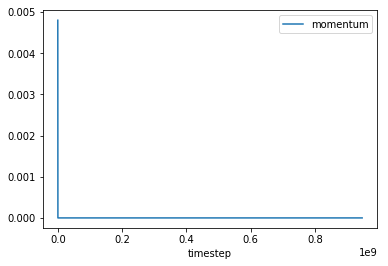

In [16]:
df.plot(y='')

In [3]:
print(f'The temperature of the simulation is {df.temperature.mean():.4f} which matches the intended temperature of 1.50')

The temperature of the simulation is 1.4999 which matches the intended temperature of 1.50


A feature I am particularly interested in is the calculation of the kinetic energy for each simulation

In [4]:
from sdanalysis import HoomdFrame
import gsd.hoomd

In [28]:
with gsd.hoomd.open("../data/simulations/2018-05-01-dynamics/output/trajectory-Trimer-P13.50-T1.50-p2gg.gsd") as traj:
    snap = HoomdFrame(traj[0])

It is relatively simple to calculate the translational kinetic energy for a configuration

In [35]:
mass = 3
trans_KE = 0.5 * 3 * np.mean(np.sum(np.square(snap.frame.particles.velocity[:snap.num_mols]), axis=1))
trans_KE

4.497885704040527

With the relationship $T=KE$, our kinetic energy is 3 times the expected value, and 3 times what hoomd is calculating. Which would mean it is using a mass of 1 for the molecules.